# **Applying Image Processing Filters For Image Cartoonifying**

## Initiallizing the code

In [ ]:
import cv2
from google.colab import drive
from matplotlib import pyplot as plt
import numpy as np
import skimage.filters
from skimage.filters import threshold_otsu
from skimage import img_as_ubyte

In [ ]:
drive.mount('/content/drive')
image_path = "drive/My Drive/old-man.PNG"

Mounted at /content/drive


## Bluring and Finding Edges

(<matplotlib.axes._subplots.AxesSubplot at 0x7fdab7a72978>,
 <matplotlib.image.AxesImage at 0x7fdab6c03470>)

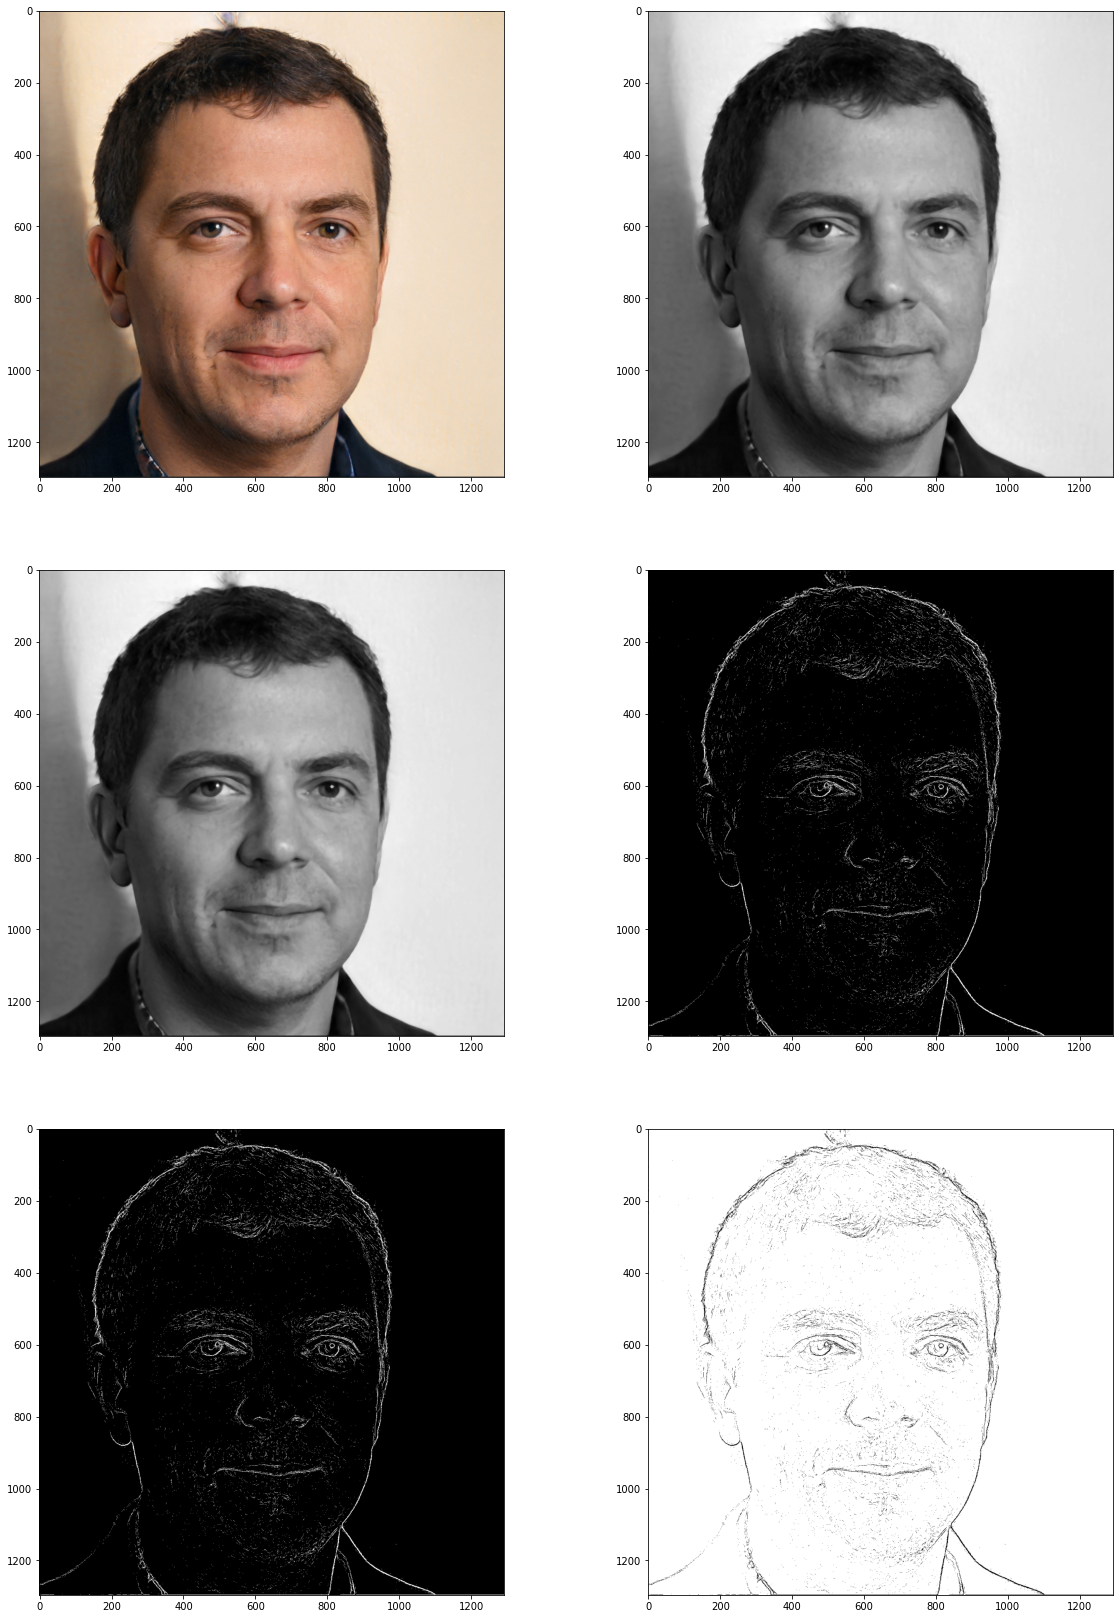

In [ ]:
img = cv2.imread("person.jpg", cv2.IMREAD_COLOR)
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 
gray = cv2.cvtColor(RGB_img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize = (20,60))
plt.subplot(6,2,1),plt.imshow(RGB_img)


median = cv2.medianBlur(gray,7)
plt.subplot(6,2,2),plt.imshow(median,cmap = 'gray')

temp = cv2.Laplacian(median,cv2.CV_8U)


plt.subplot(6,2,3),plt.imshow(median,cmap = 'gray')


(thresh, blackAndWhiteImage) = cv2.threshold(temp,4,255, cv2.THRESH_BINARY)
plt.subplot(6,2,4),plt.imshow(blackAndWhiteImage,cmap = 'gray')

(thresh, whiteBlackImage) = cv2.threshold(temp,4,255, cv2.THRESH_BINARY_INV)

plt.subplot(6,2,5),plt.imshow(blackAndWhiteImage,cmap = 'gray')
plt.subplot(6,2,6),plt.imshow(whiteBlackImage,cmap = 'gray')


## Filtering the original image with bilateral filter

(<matplotlib.axes._subplots.AxesSubplot at 0x7f89af2ec2e8>,
 <matplotlib.image.AxesImage at 0x7f89ad40fc88>)

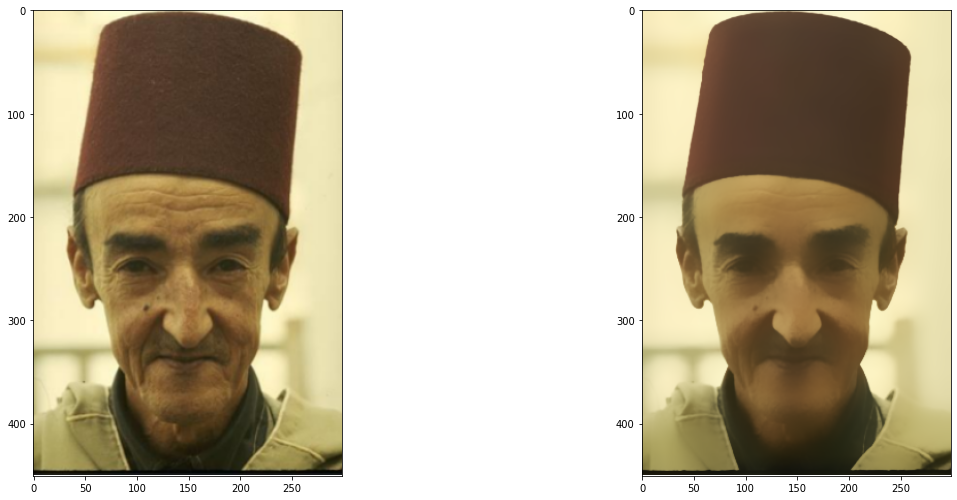

In [ ]:
blur = cv2.bilateralFilter(RGB_img,1500,9,9)
plt.figure(figsize = (20,60))
plt.subplot(6,2,1),plt.imshow(RGB_img)

plt.subplot(6,2,2),plt.imshow(blur)


(<matplotlib.axes._subplots.AxesSubplot at 0x7fdab7a72128>,
 <matplotlib.image.AxesImage at 0x7fdab6678470>)

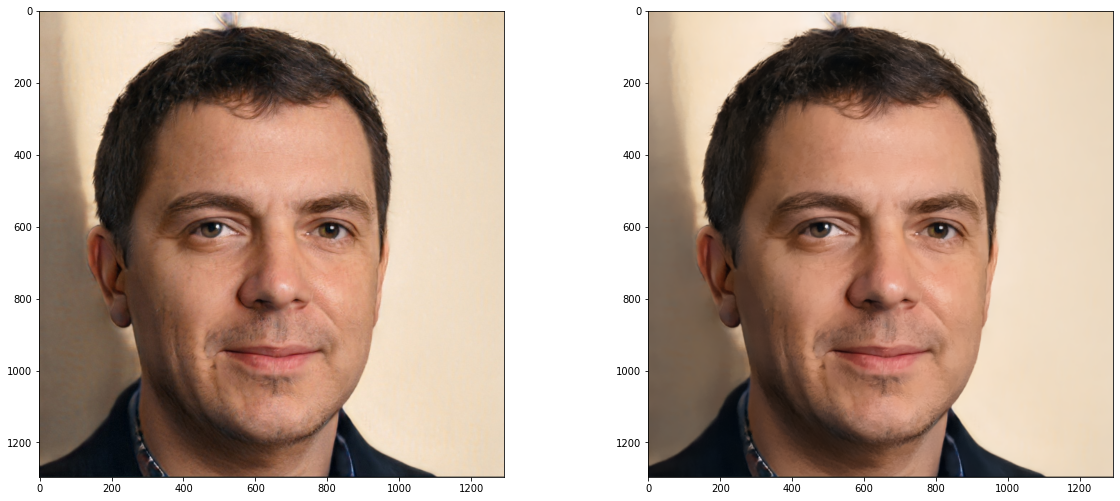

In [ ]:
blur2 = cv2.bilateralFilter(RGB_img,50,9,9)
plt.figure(figsize = (20,60))
plt.subplot(6,2,1),plt.imshow(RGB_img)

plt.subplot(6,2,2),plt.imshow(blur2)


## Adding Edges to the filtered image

(1296, 1293)
uint8
uint8


(<matplotlib.axes._subplots.AxesSubplot at 0x7fdab4e244a8>,
 <matplotlib.image.AxesImage at 0x7fdab4dd4780>)

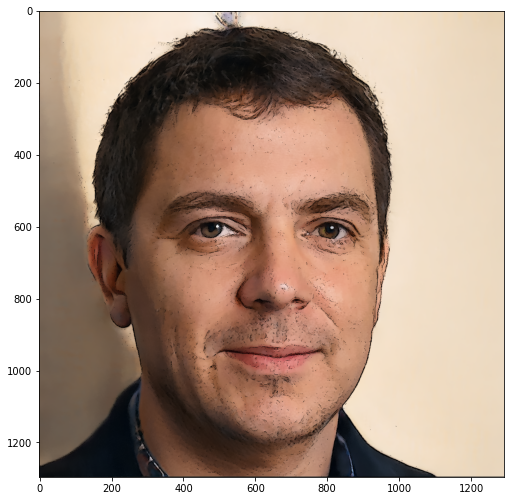

In [ ]:

print(whiteBlackImage.shape)
whiteBlackImagenew = np.repeat(whiteBlackImage[:, :, np.newaxis], 3, axis=2)

print(whiteBlackImagenew.dtype)
print(blur2.dtype)

dst = cv2.bitwise_and(blur2, whiteBlackImagenew)


plt.figure(figsize = (20,60))
plt.subplot(6,2,1),plt.imshow(dst)

